# Brief Primer on Descriptive Statistics
## Athlete Statistics at the 2016 Rio Olympics

This notebook serves as a very basic primer on Desrciptive Statistics and will explain concepts which are fundamental to understanding Inferential Statistics, its tools and techniques. More specifically, we will be looking at athlete data from the 2016 Rio Olympics and experimenting with the various theories of statistics explained in the slides.

The dataset was obtained from Kaggle (https://www.kaggle.com/rio2016/olympic-games#_=_) and was uploaded by Rio 2016.

## Importing Libraries and loading the data

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('data/athletes.csv')
df.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0


## Central Tendencies

The central tendencies are values which represent the central or 'typical' value of the given distribution. The three most popular central tendency estimates are the mean, median and mode. Typically, in most cases, we resort to using mean (for normal distributions) and median (for skewed distributions) to report central tendency values.

A good rule of thumb is to use mean when outliers don't affect its value and median when it does (Bill Gates joke, anyone?).

Calculating the mean and median are extremely trivial with Pandas. In the following cell, we have calculated the mean and median of the athlete heights in the 2016 Olympics. As we can see below, the mean and the median are almost equal. 

In [66]:
heights = df['height']
heights.mean(), heights.median()

(1.766282119914347, 1.76)

## Measures of Spread

Apart from the central or typical value of the data, we are also interested in knowing how much the data spreads. That is, how far from the mean do values tend to go. Statistics equips us with two measures to quantitatively represent the spread: the variance and the standard deviation. They are dependent quantities, with the standard deviation being defined as the square root of variance.

As above, calculating the standard deviation (and variance) is trivial with Pandas as can be seen below.

In [67]:
heights.std(), heights.var()

(0.11271869117624804, 0.012705503340486377)

The mean and the standard deviation are often the best quantities to summarize the data for distributions with symmetrical histograms without too many outliers. As we can see from the histogram below, this indeed is the case for athlete heights. Therefore, the mean and the standard deviation measures are sufficient information and other tendencies such as the median does not add too much of extra information.

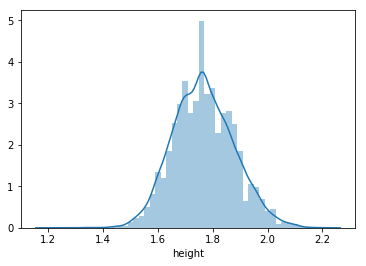

In [68]:
heights = heights.fillna(heights.mean())
sns.distplot(heights)

## The Binomial Distribution

A Bernouilli trial is an experiment with exactly two possible outcomes: Success and Failure. We usually denote success with 1 and failure with 0. Bernoulli trials have the same success (and failure) rate for every trial and each trial is independent of every other trial.

Now, let's say we conduct n Bernouilli trials. The probability of getting k successes out of these n experiments is modelled by the Binomial random variable. 

The coin toss is a classic example of a Bernoulli trial. Let us simulate an experiment where we flip a coin a 100 times and count the number of heads. We will then proceed to repeat this experiment a thousand times and plot the binomial distribution of the number of heads we got in each experiment.

In [69]:
np.random.seed(42)

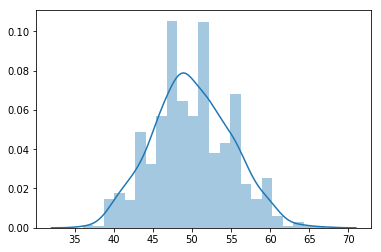

In [70]:
outcomes = []
for i in range(1000):
    num_heads = np.random.binomial(100, 0.5)
    outcomes.append(num_heads)

sns.distplot(outcomes)

## The Normal Distribution

The normal distribution is probably the most important and commonly occuring distribution in nature. The normal distribution was first arrived at by De Moivre when he was trying to come up with a continuous approximation to binomial distributions with p = 0.5. 

The blue line in the graph above is the normal approximation of the binomial distribution. As n is increased, the binomail distribution plot will approach the bell curve traced by the blue line.

Let us now simulate a similar experiment as above. Let us sample a 1000 points from a normal distribution and plot the number of occurences in the form of a histogram.

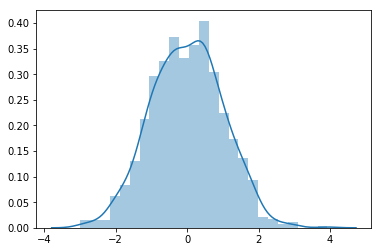

In [71]:
outcomes = []
for i in range(1000):
    point = np.random.normal(0, 1)
    outcomes.append(point)

sns.distplot(outcomes)

A major reason for the ubiquity of the Normal Distribution has to do with the **Central Limit Theorem**. Naively stated, data that are affected by small and independent effects tend to be normally distributed. Since this is true for most of the attributes found in nature, the normal distribution is ubiquitously observed.

## Normal Tests

We had stated earlier that heights and weights are approximately normally distributed. But how do we know this? To put it more generally, given a sample, how can we test if the distribution is normal?

This is usually done in two ways:
* **Histograms**: We have already covered this in a previous section. If the distribution shape is like a bell curve, we can be reasonably sure that it is normal.
* **Normal Test**: The Scipy package gives us a very handy normaltest method that lets us calculate the probability that the distrbution is normal, by chance.

Let us now check for the normalcy of the athlete weights in our dataset.

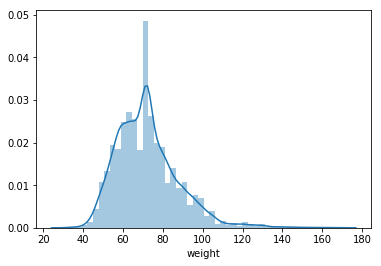

In [72]:
weights = df['weight']
weights = weights.fillna(weights.mean())

sns.distplot(weights)

In [78]:
stats.normaltest(weights)

NormaltestResult(statistic=2248.5167819876365, pvalue=0.0)

As can be seen above, the weights in our dataset are not normally distributed. The histrogram plot does not exactly resemble a bell curve and the normal test gives a p-value of 0, which means that there almost no chance that the distribution is normal.

This observation of Olympic athlete weights is pretty interesting as human weights, in general, tend to be normally distributed.

## Z-Score and P-Value

The z-score and p-value are central to almost every statistical inference tool and hypothesis testing methods. The Z-score is measure of how many standard deviations away from the mean, a particular sample point is. The p-value gives us the probability that of getting a z-score less than or equal to the given z-score and in a sense, is a measure of the number of sample points that have a z-score less than or equal to the corresponding value of z.

The Scipy package gives us two very useful functions to get the p-value for a given z-score and vice versa. The code below tries to calculate the number of sample points that fall within one, two and three standard deviations from the mean.

In [104]:
def pvalue(z):
    return 1 - 2 * (1 - stats.norm.cdf(z))

In [126]:
pvalue(1), pvalue(2), pvalue(3)

(0.68268949213708585, 0.95449973610364158, 0.99730020393673979)

In [127]:
def zscore(frac):
    return stats.norm.ppf(0.5 + frac/2)

In [128]:
zscore(0.50), zscore(0.68), zscore(0.99)

(0.67448975019608171, 0.99445788320975348, 2.5758293035489004)